This is a exploratory data analysis on Master's programs in data science, in the US. This dataset is extracted from https://www.kaggle.com/datasets/stevekulakowski/2021-data-science-masters-programs. The dataset includes statistics and rankings of each respective university. As an undergraduate student with an interest in pursuing a Master's degree in data science, this project will help me determine the best fitting school.
<br>
It's important to note that this dataset doesn't include all US universities, but the top 250 universities with great data science programs. It's also important to note that the cost of universities may differ,depending on your current state residency. For example, those that aren't current residents of NY will have to pay out-of-state tuition, while those who are will have to pay in-state-tuition. The cost is adjusted for the usage of NY residents only. There is also a set standard of 3.0 minimum GPA to be admitted to programs, if universities did not provide minimum GPA to be admitted. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
uni = pd.read_csv("msdsPrograms.csv")
uni

,School Name,State,City,Ranking,Online,Total_Tuition_Cost,Program_Years_Full_Time,Min_Quant_GRE_Score,Min_Undergraduate_GPA,Median_Salary_10yr,Need_GRE,Institution Type
0,Columbia University,NY,New York City,5,0,68160,1.0,NaN,3.7,132100,0,Private
1,University of Texas-Austin,TX,Austin,45,1,10000,2.0,160.0,3.0,115600,1,Public
2,University of Southern California,CA,Los Angeles,17,0,47880,1.5,NaN,3.5,126300,0,Private
3,University of Miami,FL,Miami,87,0,66390,1.5,NaN,3.0,101000,0,Private
4,Syracuse University,NY,Syracuse,113,1,58956,1.5,NaN,3.0,109100,0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Georgia State University,GA,Atlanta,241,0,45000,1.0,NaN,3.0,90900,0,Public
110,Pace University,NY,New York City,243,0,41250,1.0,NaN,3.0,111800,0,Private
111,Pace University,NY,New York City,243,1,31500,1.0,NaN,3.0,111800,0,Private
112,Chapman University,CA,Orange,246,0,54095,2.0,146.0,3.0,102100,1,Private


In [4]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   School Name              114 non-null    object 
 1   State                    114 non-null    object 
 2   City                     114 non-null    object 
 3   Ranking                  114 non-null    int64  
 4   Online                   114 non-null    int64  
 5   Total_Tuition_Cost       114 non-null    int64  
 6   Program_Years_Full_Time  114 non-null    float64
 7   Min_Quant_GRE_Score      31 non-null     float64
 8   Min_Undergraduate_GPA    114 non-null    float64
 9   Median_Salary_10yr       114 non-null    int64  
 10  Need_GRE                 114 non-null    int64  
 11  Institution Type         114 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 10.8+ KB


In [5]:
uni.shape

(114, 12)

In [6]:
new_cols_dict = {
    "School Name": "schoolName",
    "State": "State",
    "City": "City",
    "Ranking": "Ranking",
    "Online": "onlineOption",
    "Total_Tuition_Cost": "tuitionCost",
    "Program_Years_Full_Time": "completionYears",
    "Min_Quant_GRE_Score": "minGRE",
    "Min_Undergraduate_GPA": "minGPA",
    "Median_Salary_10yr": "avgSalary",
    "Need_GRE": "GREoption",
    "Institution Type": "schoolType"
}
uni.rename(new_cols_dict, axis=1, inplace=True)
uni

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
0,Columbia University,NY,New York City,5,0,68160,1.0,NaN,3.7,132100,0,Private
1,University of Texas-Austin,TX,Austin,45,1,10000,2.0,160.0,3.0,115600,1,Public
2,University of Southern California,CA,Los Angeles,17,0,47880,1.5,NaN,3.5,126300,0,Private
3,University of Miami,FL,Miami,87,0,66390,1.5,NaN,3.0,101000,0,Private
4,Syracuse University,NY,Syracuse,113,1,58956,1.5,NaN,3.0,109100,0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Georgia State University,GA,Atlanta,241,0,45000,1.0,NaN,3.0,90900,0,Public
110,Pace University,NY,New York City,243,0,41250,1.0,NaN,3.0,111800,0,Private
111,Pace University,NY,New York City,243,1,31500,1.0,NaN,3.0,111800,0,Private
112,Chapman University,CA,Orange,246,0,54095,2.0,146.0,3.0,102100,1,Private


The dataset consist of 114 rows of universitiy information and 12 columns of categories {schoolName, State, City, Ranking, onlineOption, tuitionCost, completionYears, min_GRE, minGPA, avgSalary, GREoption, and schoolType}.

In [7]:
onlineOption_dict = {
    "0":"In-person",
    "1":"Online"
}
greoption = {
    "0":"Not Required",
    "1":"Required"
}
uni.onlineOption = uni.onlineOption.astype("str")
uni.onlineOption = uni.onlineOption.map(onlineOption_dict)
uni.GREoption = uni.GREoption.astype("str")
uni.GREoption = uni.GREoption.map(greoption)
uni.head()

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
0,Columbia University,NY,New York City,5,In-person,68160,1.0,NaN,3.7,132100,Not Required,Private
1,University of Texas-Austin,TX,Austin,45,Online,10000,2.0,160.0,3.0,115600,Required,Public
2,University of Southern California,CA,Los Angeles,17,In-person,47880,1.5,NaN,3.5,126300,Not Required,Private
3,University of Miami,FL,Miami,87,In-person,66390,1.5,NaN,3.0,101000,Not Required,Private
4,Syracuse University,NY,Syracuse,113,Online,58956,1.5,NaN,3.0,109100,Not Required,Private


In [8]:
completion = uni["completionYears"].mean()
completion

1.4824561403508771

Average time of completion to acquire a Master's degree in data science is about 1.5 years.

In [9]:
avgGRE = uni[uni["GREoption"]=="Required"]["minGRE"].mean()
avgGRE

156.70967741935485

Average minimum GRE score needed for universities that require GRE is about 157.

In [10]:
topRank = uni.sort_values("Ranking", ascending=True)
topRank.head(10)

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
9,University of California-Berkeley,CA,Berkeley,1,Online,73224,1.0,NaN,3.0,138800,Not Required,Public
10,Yale University,NH,New Haven,2,In-person,68550,1.5,NaN,3.8,141300,Not Required,Private
16,Stanford University,CA,Stanford,4,In-person,54315,1.0,165.0,3.7,147100,Required,Private
0,Columbia University,NY,New York City,5,In-person,68160,1.0,NaN,3.7,132100,Not Required,Private
17,Harvard University,MA,Cambridge,7,In-person,87336,1.5,NaN,3.7,147700,Not Required,Private
18,University of California-Los Angeles,CA,Los Angeles,8,Online,37800,2.0,165.0,3.0,122400,Required,Public
8,University of Pennsylvania,PA,Philadelphia,9,In-person,73280,1.5,165.0,3.7,142900,Required,Private
19,Northwestern University,IL,Evanston,10,Online,57468,1.0,NaN,3.4,120300,Not Required,Private
20,Duke University,NC,Durham,12,In-person,120440,2.0,NaN,3.5,135000,Not Required,Private
21,Cornell University,NY,Ithaca,13,In-person,60286,1.0,163.0,3.7,133100,Required,Private


Top 10 best US universitiies to obtain master's degree in data science.

In [11]:
low_cost = uni.sort_values("tuitionCost", ascending=True)
low_cost.head(25)

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
1,University of Texas-Austin,TX,Austin,45,Online,10000,2.0,160.0,3.00,115600,Required,Public
42,Stony Brook University-SUNY,NY,Stony Brook,62,In-person,14601,1.5,NaN,3.00,111000,Not Required,Public
60,Arizona State University,AZ,Tempe,121,Online,15000,1.0,NaN,3.00,101700,Not Required,Public
105,University of North Texas,TX,Denton,234,In-person,16488,2.0,NaN,3.20,92600,Not Required,Public
6,University of Colorado-Boulder,CO,Boulder,126,Online,20010,1.0,NaN,3.20,114600,Not Required,Public
96,Oklahoma State University,OK,Stillwater,204,Online,20175,2.0,145.0,3.00,99700,Required,Public
89,University of Kansas,KS,Lawrence,188,Online,21000,1.5,NaN,3.00,100800,Not Required,Public
88,University at Albany-SUNY,NY,Albany,187,In-person,21194,1.5,NaN,3.00,106000,Not Required,Public
44,San Diego State University,CA,San Diego,66,In-person,21512,1.0,155.0,3.00,104700,Required,Public
97,California State University-East Bay,CA,Hayward,207,In-person,23436,1.5,NaN,2.50,104400,Not Required,Public


Top 25 universities with the lowest tuition cost to attend the program. They tend to be public universtities.

In [12]:
high_cost = uni.sort_values("tuitionCost", ascending=False)
high_cost.head(25)

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
20,Duke University,NC,Durham,12,In-person,120440,2.0,NaN,3.50,135000,Not Required,Private
22,Vanderbilt University,TN,Nashville,14,In-person,103200,2.0,NaN,3.50,122400,Not Required,Private
39,Carnagie Mellon University,PA,Pittsburgh,49,In-person,100656,1.5,163.0,3.40,136500,Required,Private
17,Harvard University,MA,Cambridge,7,In-person,87336,1.5,NaN,3.70,147700,Not Required,Private
29,Brown University,RI,Providence,26,In-person,80527,1.0,163.0,3.50,136700,Required,Private
28,Rice University,TX,Houston,24,In-person,77250,1.5,NaN,3.00,134100,Not Required,Private
73,Auburn University,AL,Auburn,150,In-person,75990,1.5,150.0,2.75,105400,Required,Public
26,University of Michigan,MI,Ann Arbor,22,In-person,75204,1.5,NaN,3.00,112300,Not Required,Public
8,University of Pennsylvania,PA,Philadelphia,9,In-person,73280,1.5,165.0,3.70,142900,Required,Private
9,University of California-Berkeley,CA,Berkeley,1,Online,73224,1.0,NaN,3.00,138800,Not Required,Public


Top 25 universities with the highest tuition cost to attend the program. They tend to be private universities.

In [13]:
nySchools = uni.loc[uni["State"]=="NY"]
nySchools.sort_values("tuitionCost",ascending=True)

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
42,Stony Brook University-SUNY,NY,Stony Brook,62,In-person,14601,1.5,NaN,3.0,111000,Not Required,Public
88,University at Albany-SUNY,NY,Albany,187,In-person,21194,1.5,NaN,3.0,106000,Not Required,Public
111,Pace University,NY,New York City,243,Online,31500,1.0,NaN,3.0,111800,Not Required,Private
87,Rochester Institute of Technology,NY,Rochester,178,Online,37110,1.0,NaN,3.0,105200,Not Required,Private
110,Pace University,NY,New York City,243,In-person,41250,1.0,NaN,3.0,111800,Not Required,Private
84,Fordham University,NY,New York City,168,In-person,41400,1.5,NaN,3.0,118200,Not Required,Private
113,Adelphi University,NY,Garden City,249,In-person,42600,1.5,NaN,3.0,94800,Not Required,Private
56,University at Buffalo-SUNY,NY,Buffalo,111,In-person,46170,1.0,NaN,3.0,97800,Not Required,Public
86,Rochester Institute of Technology,NY,Rochester,178,In-person,52092,1.0,NaN,3.0,105200,Not Required,Private
48,University of Rochester,NY,Rochester,78,In-person,54540,1.0,NaN,3.2,116000,Not Required,Private


A subset of the top 250 gradaute schools, in NY, that offer a master's degree in data science.

In [14]:
bestNY = nySchools[(nySchools["Ranking"]<100) & (nySchools["tuitionCost"]<20000)]
bestNY

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
42,Stony Brook University-SUNY,NY,Stony Brook,62,In-person,14601,1.5,NaN,3.0,111000,Not Required,Public


NY schools would benefit my situation because I am looking for an affordable university that is close to home. I would pay in-state tuition attending a univeristy in NY. Stony Brook University would be an ideal choice for me, because it has a low tuition cost while still ranking in the top 100s of master's program in Data Science, in the US. The tuition cost to attend this program is $14,601, which is way less than average graduate school tuition pricing ($30,000). There is also no GRE requirement needed to attend this program.

In [15]:
bestOnline = uni[(uni["onlineOption"]=="Online") & (uni["tuitionCost"]<30000) & (uni["Ranking"]<100)]
bestOnline

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
1,University of Texas-Austin,TX,Austin,45,Online,10000,2.0,160.0,3.0,115600,Required,Public
12,Indiana University-Bloomington,IN,Bloomington,90,Online,24825,1.5,NaN,3.0,99500,Not Required,Public
23,University of California-San Diego,CA,San Diego,15,Online,27400,1.5,NaN,3.0,128900,Not Required,Public


For students that wish to take their master's degree online, should choose to attend these three universities {University of Texas-Austin, Indiana University-Bloomington, University of California-San Diego}. These universitities cost less than the average graduate school tuition, $30,000, while still ranking in the top 100s of data science programs.

In [16]:
bestInPerson = uni[(uni["onlineOption"]=="In-person") & (uni["tuitionCost"]<30000) & (uni["Ranking"]<100)]
bestInPerson

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
42,Stony Brook University-SUNY,NY,Stony Brook,62,In-person,14601,1.5,NaN,3.0,111000,Not Required,Public
44,San Diego State University,CA,San Diego,66,In-person,21512,1.0,155.0,3.0,104700,Required,Public
50,University of Minnesota-Twin Cities,MN,Minneapolis,84,In-person,26350,2.0,NaN,3.5,105700,Not Required,Public


For students that wish to take their master's degree in-person, should choose to attend these three universities {Stony Brook University-SUNY, San Diego State University, and University of Minnesota-Twin Cities}. These universities cost less than the average graduate school tuitiion, $30,000, while still ranking in the top 100s of data science programs.

In [17]:
noGRE = uni[(uni["GREoption"]=="Not Required") & (uni["tuitionCost"]<30000) & (uni["Ranking"]<100)]
noGRE

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
12,Indiana University-Bloomington,IN,Bloomington,90,Online,24825,1.5,NaN,3.0,99500,Not Required,Public
23,University of California-San Diego,CA,San Diego,15,Online,27400,1.5,NaN,3.0,128900,Not Required,Public
42,Stony Brook University-SUNY,NY,Stony Brook,62,In-person,14601,1.5,NaN,3.0,111000,Not Required,Public
50,University of Minnesota-Twin Cities,MN,Minneapolis,84,In-person,26350,2.0,NaN,3.5,105700,Not Required,Public


For students that doesn't want to take GRE but wants to attend an online university master's program with decent ranking and low tuition cost. They should consider attending {Indiana University-Bloomington or University of California-San Diego}. For students that doesn't want to take GRE but wants to attend an in-person university master's program with decent ranking and low tuition cost. They should consider attending {Stony Brook University-SUNY or University of Minnesota-Twin Cities}.

In [18]:
highSalary = uni[uni["avgSalary"]>145000]
highSalary

,schoolName,State,City,Ranking,onlineOption,tuitionCost,completionYears,minGRE,minGPA,avgSalary,GREoption,schoolType
16,Stanford University,CA,Stanford,4,In-person,54315,1.0,165.0,3.7,147100,Required,Private
17,Harvard University,MA,Cambridge,7,In-person,87336,1.5,NaN,3.7,147700,Not Required,Private
45,Santa Clara University,CA,Santa Clara,71,Online,55356,1.0,155.0,3.5,146300,Required,Private
46,Santa Clara University,CA,Santa Clara,71,In-person,55356,1.0,155.0,3.5,146300,Required,Private


For students that mainly look for a high average wage salary, ~$145,000, after graduating with a master's degree. They should reach for universities such as {Standford University, Harvard University, Santa Clara University}.

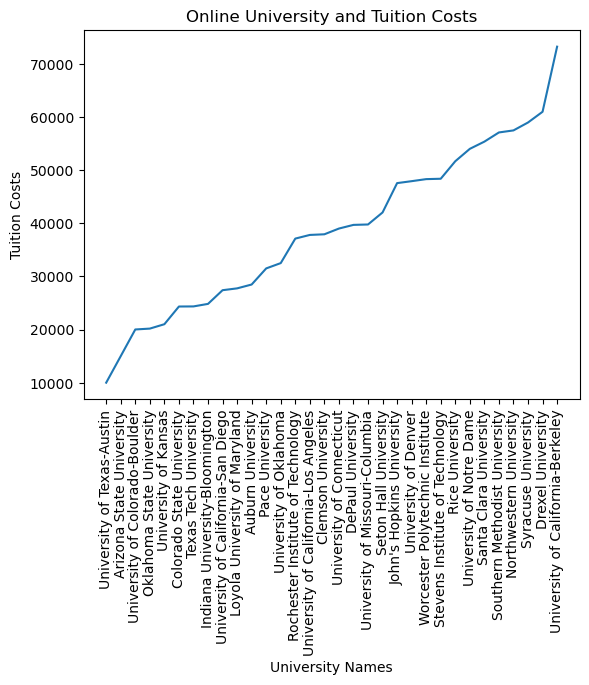

In [19]:
onlineCond = uni[uni["onlineOption"]=="Online"].sort_values("tuitionCost", ascending=True)
onlineCond2 = onlineCond["schoolName"]
onlineCond3 = onlineCond["tuitionCost"]
plt.plot(onlineCond2, onlineCond3)
plt.xticks(rotation=90)
plt.title("Online University and Tuition Costs")
plt.xlabel("University Names")
plt.ylabel("Tuition Costs")
plt.show()

A line graph displaying online schools and their corresponding tuition costs, in a positive slope. The most expensive online school is University of California-Berkeley and the least expensive online school is University of Texas-Austin.

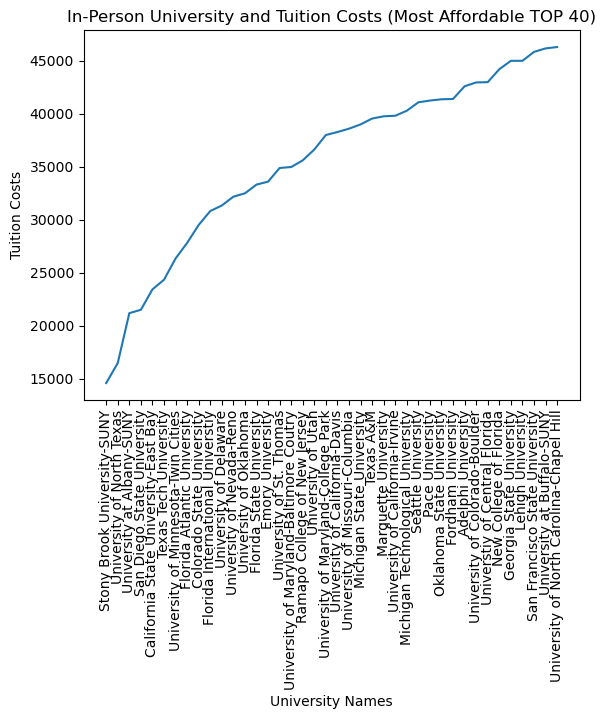

In [20]:
inperCond = uni[uni["onlineOption"]=="In-person"].sort_values("tuitionCost", ascending=True) #cheapeast 40 universities
inperCond2 = inperCond["schoolName"].head(40)
inperCond3 = inperCond["tuitionCost"].head(40)
plt.plot(inperCond2, inperCond3)
plt.xticks(rotation=90)
plt.title("In-Person University and Tuition Costs (Most Affordable TOP 40)")
plt.xlabel("University Names")
plt.ylabel("Tuition Costs")
plt.show()

A line graph representing a small subgroup of 40 in-person universities with their corresponding tuition costs. These universities are the top 40 cheapest universities. The most affordable school, among the top 40 cheapest universities, is Stony Brook University. While the most expensive school, among the top 40 cheapest universities, is University of North Carolina-Chapel Hill.
<br>
NOTE: had to subset the data to top 40s, in order to display the names of the universities in a clearer fashion.

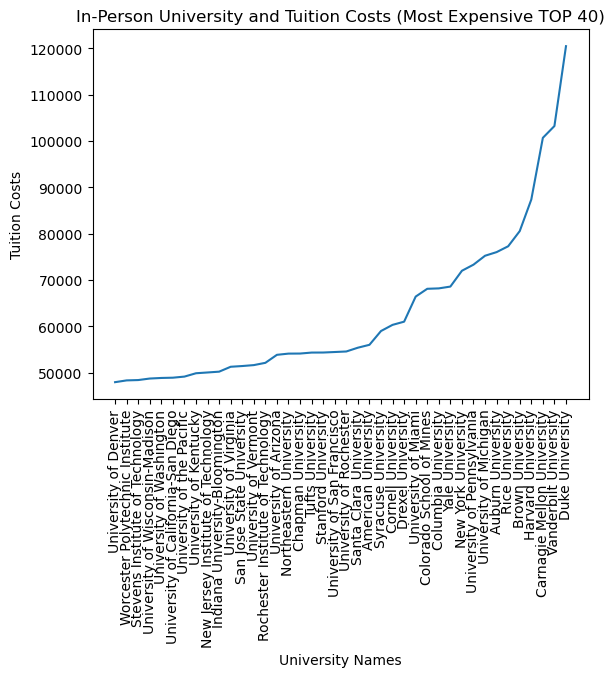

In [21]:
inperCond4 = uni[uni["onlineOption"]=="In-person"].sort_values("tuitionCost", ascending=True) #most expensive 40 universities
inperCond5 = inperCond4["schoolName"].tail(40)
inperCond6 = inperCond4["tuitionCost"].tail(40)
plt.plot(inperCond5, inperCond6)
plt.xticks(rotation=90)
plt.title("In-Person University and Tuition Costs (Most Expensive TOP 40)")
plt.xlabel("University Names")
plt.ylabel("Tuition Costs")
plt.show()

A line graph representing a small subgroup of 40 in-person universities with their corresponding tuition costs. These universities are the top 40 most expensive universities. The cheapest school, among the top 40 highest-cost universities, is University of Denver. While the most expensive school, among the top 40 highest-cost universities, is Duke University.
<br>
NOTE: had to subset the data to top 40s, in order to display the names of the universities in a clearer fashion.

<Axes: ylabel='schoolName'>

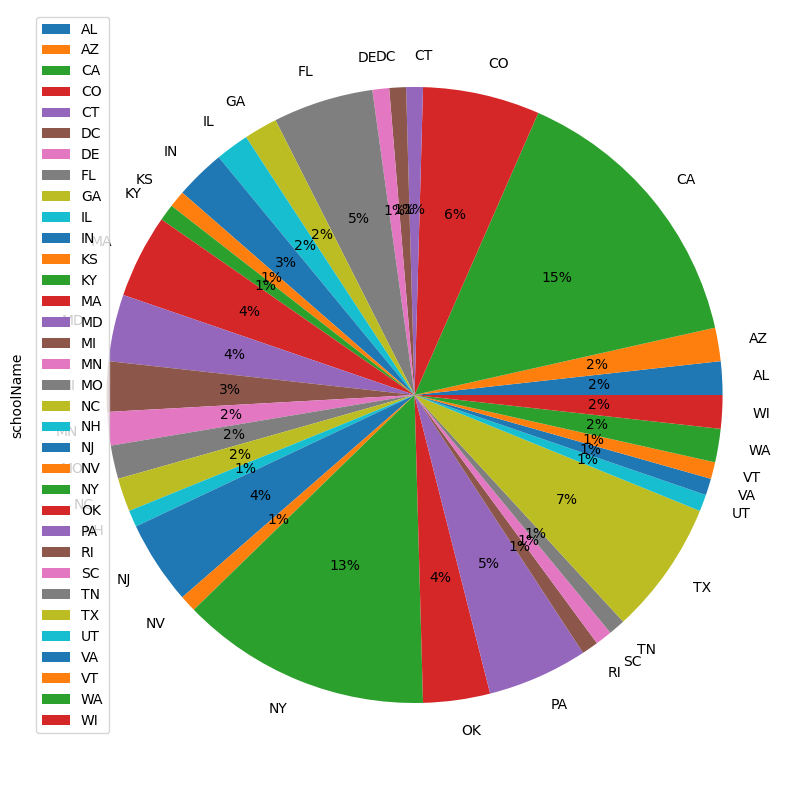

In [35]:
uni.groupby(["State"]).count().plot(kind="pie", y="schoolName", autopct='%1.0f%%',figsize=(20,10))

A pie graph representing the amount of top data science master's programs universities in each state. California and New York have the highest percentage {15% and 13% respectively.}